<a href="https://colab.research.google.com/github/Prernamishra08/1004-Book-Recommender-System/blob/main/Q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 5

### Part 1

Test Time Augmentation (TTA) for 5 instances of V100 and RTX8000:

* V100: 1034 seconds <br>
RTX8000: 1100 seconds

* V100: 582 seconds <br>
RTX8000: 2967 seconds

* V100: 1103 seconds <br>
RTX8000: 1534 seconds

* V100: 633 seconds <br>
RTX8000: 4089 seconds

* V100: 470 seconds <br>
RTX8000: 1218 seconds <br>
<br>

Coefficient of Variation: 

* V100: 37.26%   
* RTX8000: 59.65%   



Coleman et al reported a value of 4.5% for ResNet50 with 1 TPU. Both V100 and RTX8000 have a much higher coefficient of variation in it's comparison.

### Part 2

Validation Accuracy for 5 instances of V100 and RTX8000:

* V100: 87.83% <br>
RTX8000: 88.24% 

* V100: 88.22% <br>
RTX8000: 90.40% 

* V100: 84.50% <br>
RTX8000: 92.00% 

* V100: 87.98% <br>
RTX8000: 88.50% 

* V100: 88.00% <br>
RTX8000: 86.02% <br>
<br>

Metrics: 

* V100: 
  * Mean: 87.306
  * Standard Deviation: 1.5748
* RTX8000: 
  * Mean: 89.032
  * Standard Deviation: 2.2728



### Part 3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def util_plot(fname, label=""):
    dataset = pd.read_csv(fname)
    N = len(dataset.index)

    nums = np.arange(0, N)
    utilization = dataset["sm"].iloc[:N]
    mem = dataset["mem"].iloc[:N]

    plt.figure(figsize=(15,8))
    plt.plot(nums, utilization, label="GPU Core Utilization")
    plt.plot(nums, mem, label="Memory Utilization")
    plt.title("GPU Utilization Time Series: " + label)
    plt.ylim(0, 100)
    plt.xlabel("Time in seconds")
    plt.ylabel("Usage in percentage")
    plt.legend()

    plt.show()

    print(f"Mean GPU Core Utilization: {round(dataset.sm.mean(), 2)}%")
    print(f"Mean Memory Utilization: {round(dataset.mem.mean(), 2)}%")

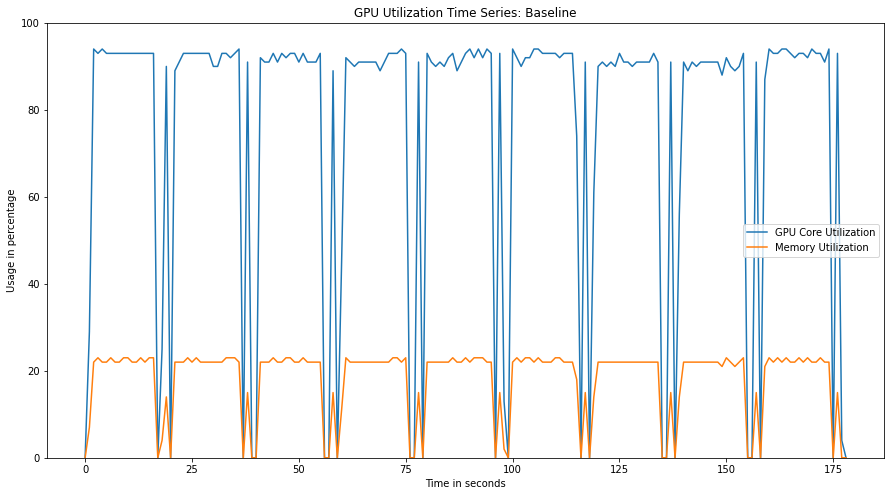

Mean GPU Core Utilization: 77.22%
Mean Memory Utilization: 18.3%


In [ ]:
util_plot("gpu_logs.txt", "Baseline")

### Part 4

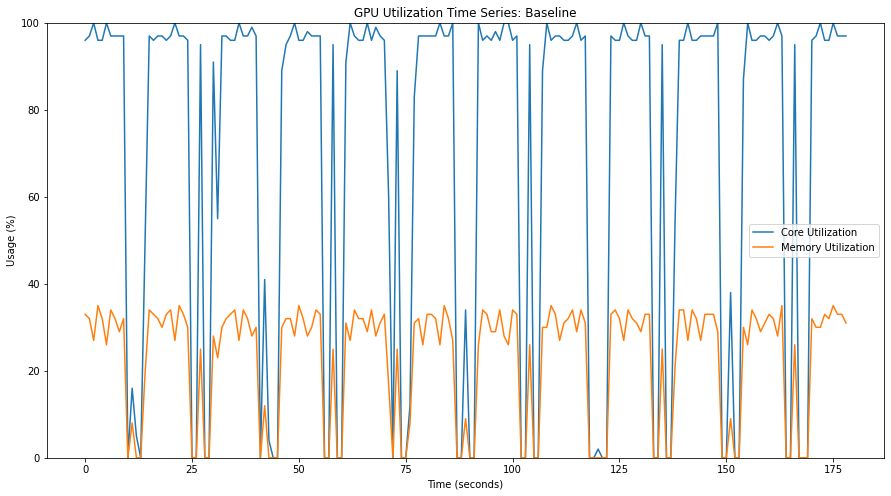

Mean Core Utilization: 70.14%
Mean Memory Utilization: 22.55%


In [ ]:
util_plot("gpu_logs_new_1024.txt", "Baseline")

Less mean GPU Core utilization than the original case was observed when batch size was increased from 128 to  1024.

These drops are a result of the communication transfer between the  GPU and the CPU when one batch is given to the other. As we see that the drops are stark, the mean value is not that high. 

When the batch size was increased, memory utilization increased.